In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf


import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Obteniendo la información del índice S&P500

sp500 = yf.Ticker("^GSPC").history(start='2000-01-01', end = None)



sp500.tail()


Failed to get ticker '^GSPC' reason: Expecting value: line 1 column 1 (char 0)
- ^GSPC: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [3]:
# Borrando las columnas 'Dividends' and 'Stock Splits'
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])

sp500.tail()

KeyError: "['Dividends', 'Stock Splits'] not found in axis"

In [ ]:
# Obteniendo información del set I
sp500.describe()

,Open,High,Low,Close,Volume
count,5846.000000,5846.000000,5846.000000,5846.000000,5.846000e+03
mean,1895.004799,1906.367559,1882.698131,1895.214796,3.309134e+09
std,983.745073,988.966273,978.075132,983.859283,1.525205e+09
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08
25%,1185.417511,1192.290009,1177.950012,1185.575043,1.993242e+09
50%,1437.619995,1447.409973,1428.789978,1437.845032,3.416465e+09
75%,2414.255005,2428.705017,2397.467468,2412.632446,4.165180e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10


In [ ]:
# Obteniendo información del set II
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5846 entries, 2000-01-03 00:00:00-05:00 to 2023-03-28 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5846 non-null   float64
 1   High    5846 non-null   float64
 2   Low     5846 non-null   float64
 3   Close   5846 non-null   float64
 4   Volume  5846 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 274.0 KB


In [ ]:
# Verificando valores duplicados
sp500[sp500.duplicated()] 


,Open,High,Low,Close,Volume
Date,,,,,


In [ ]:
# Verificando valores nulos

sp500.isnull().sum().sort_values(ascending=False)

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
# Calculando la media móvil de 50 y de 200
sp500['50ma'] = sp500['Close'].rolling(window=50).mean()
sp500['200ma'] = sp500['Close'].rolling(window=200).mean()

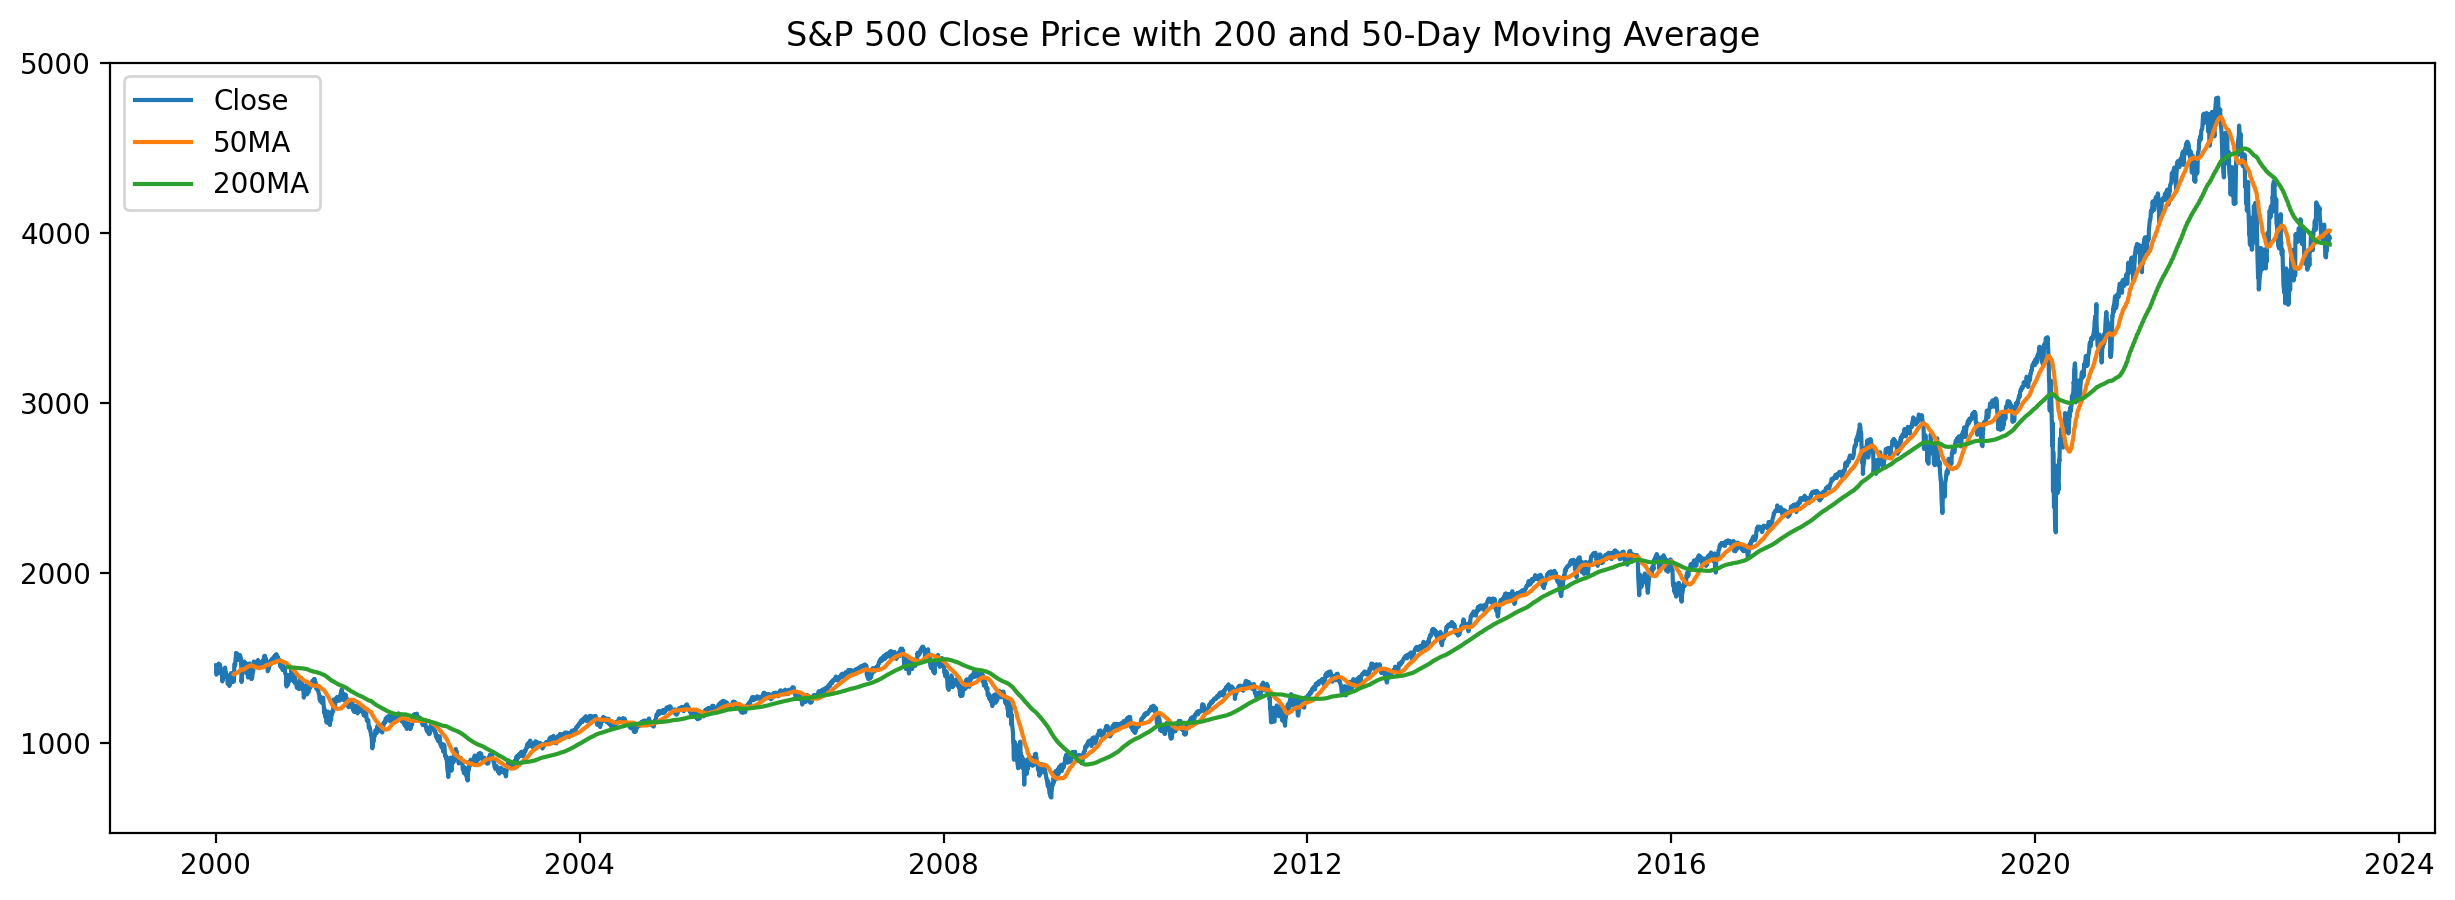

In [ ]:
# Graficando la información para ver las medias móviles
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Close Price with 200 and 50-Day Moving Average')
plt.plot(sp500['Close'])
plt.plot(sp500['50ma'])
plt.plot(sp500['200ma'])
plt.legend(['Close', '50MA', '200MA'])
plt.show()

In [ ]:
# Calculando el rendimiento diario del precio de cierre y agregando la columna 'return'
sp500['Return'] = sp500['Close'].pct_change()

sp500.tail()

,Open,High,Low,Close,Volume,50ma,200ma,Return
Date,,,,,,,,
2023-03-22 00:00:00-04:00,4002.040039,4039.489990,3936.169922,3936.969971,4533010000,4013.503208,3934.278164,-0.016463
2023-03-23 00:00:00-04:00,3959.209961,4007.659912,3919.050049,3948.719971,4991600000,4014.092607,3933.414613,0.002985
2023-03-24 00:00:00-04:00,3939.209961,3972.739990,3909.159912,3970.989990,4583970000,4014.120205,3932.466162,0.005640
2023-03-27 00:00:00-04:00,3982.929932,4003.830078,3970.489990,3977.530029,4233540000,4014.007407,3931.774962,0.001647
2023-03-28 00:00:00-04:00,3974.129883,3979.199951,3951.530029,3971.270020,4014600000,4013.451006,3931.542212,-0.001574


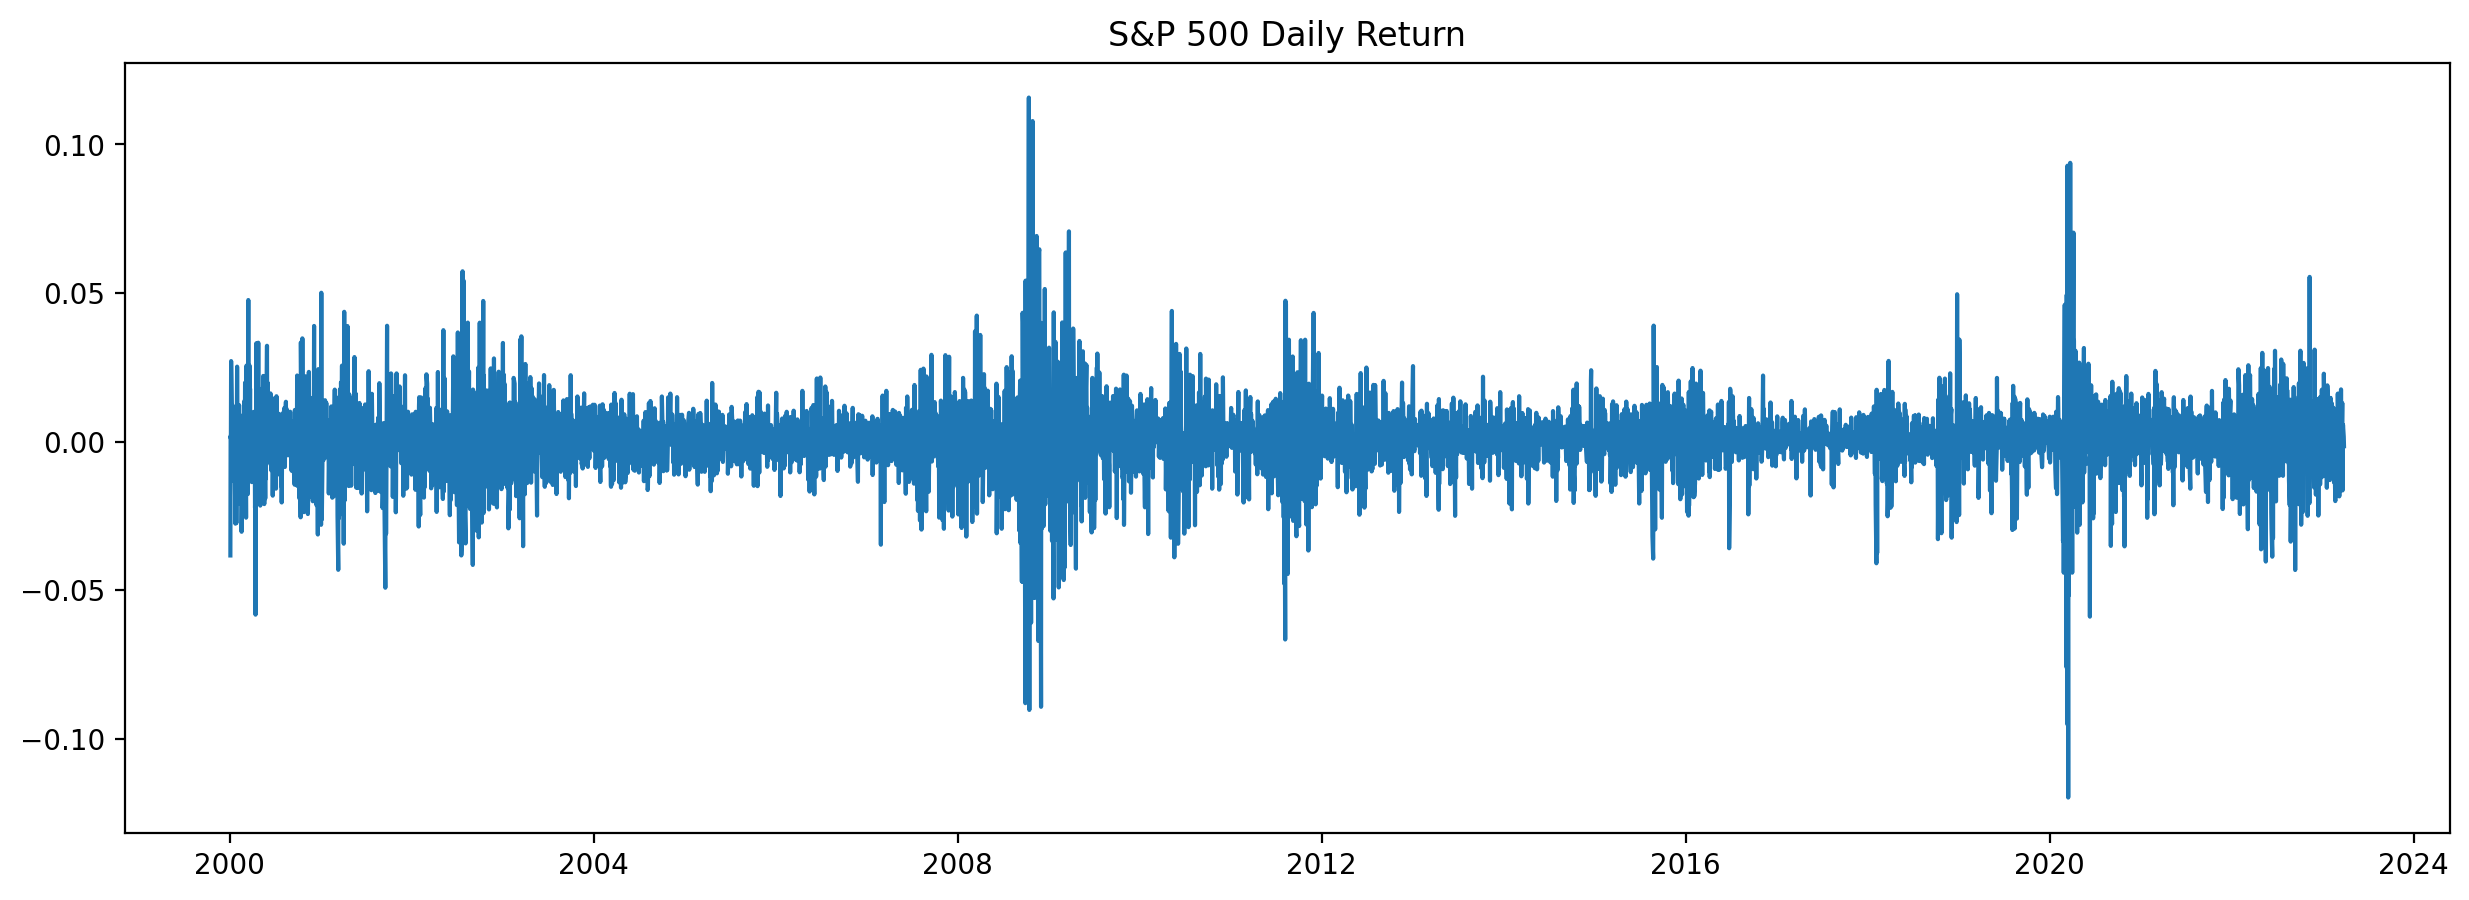

In [ ]:
# Graficando el rendimiento diario
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Daily Return')
plt.plot(sp500['Return'])
plt.show()

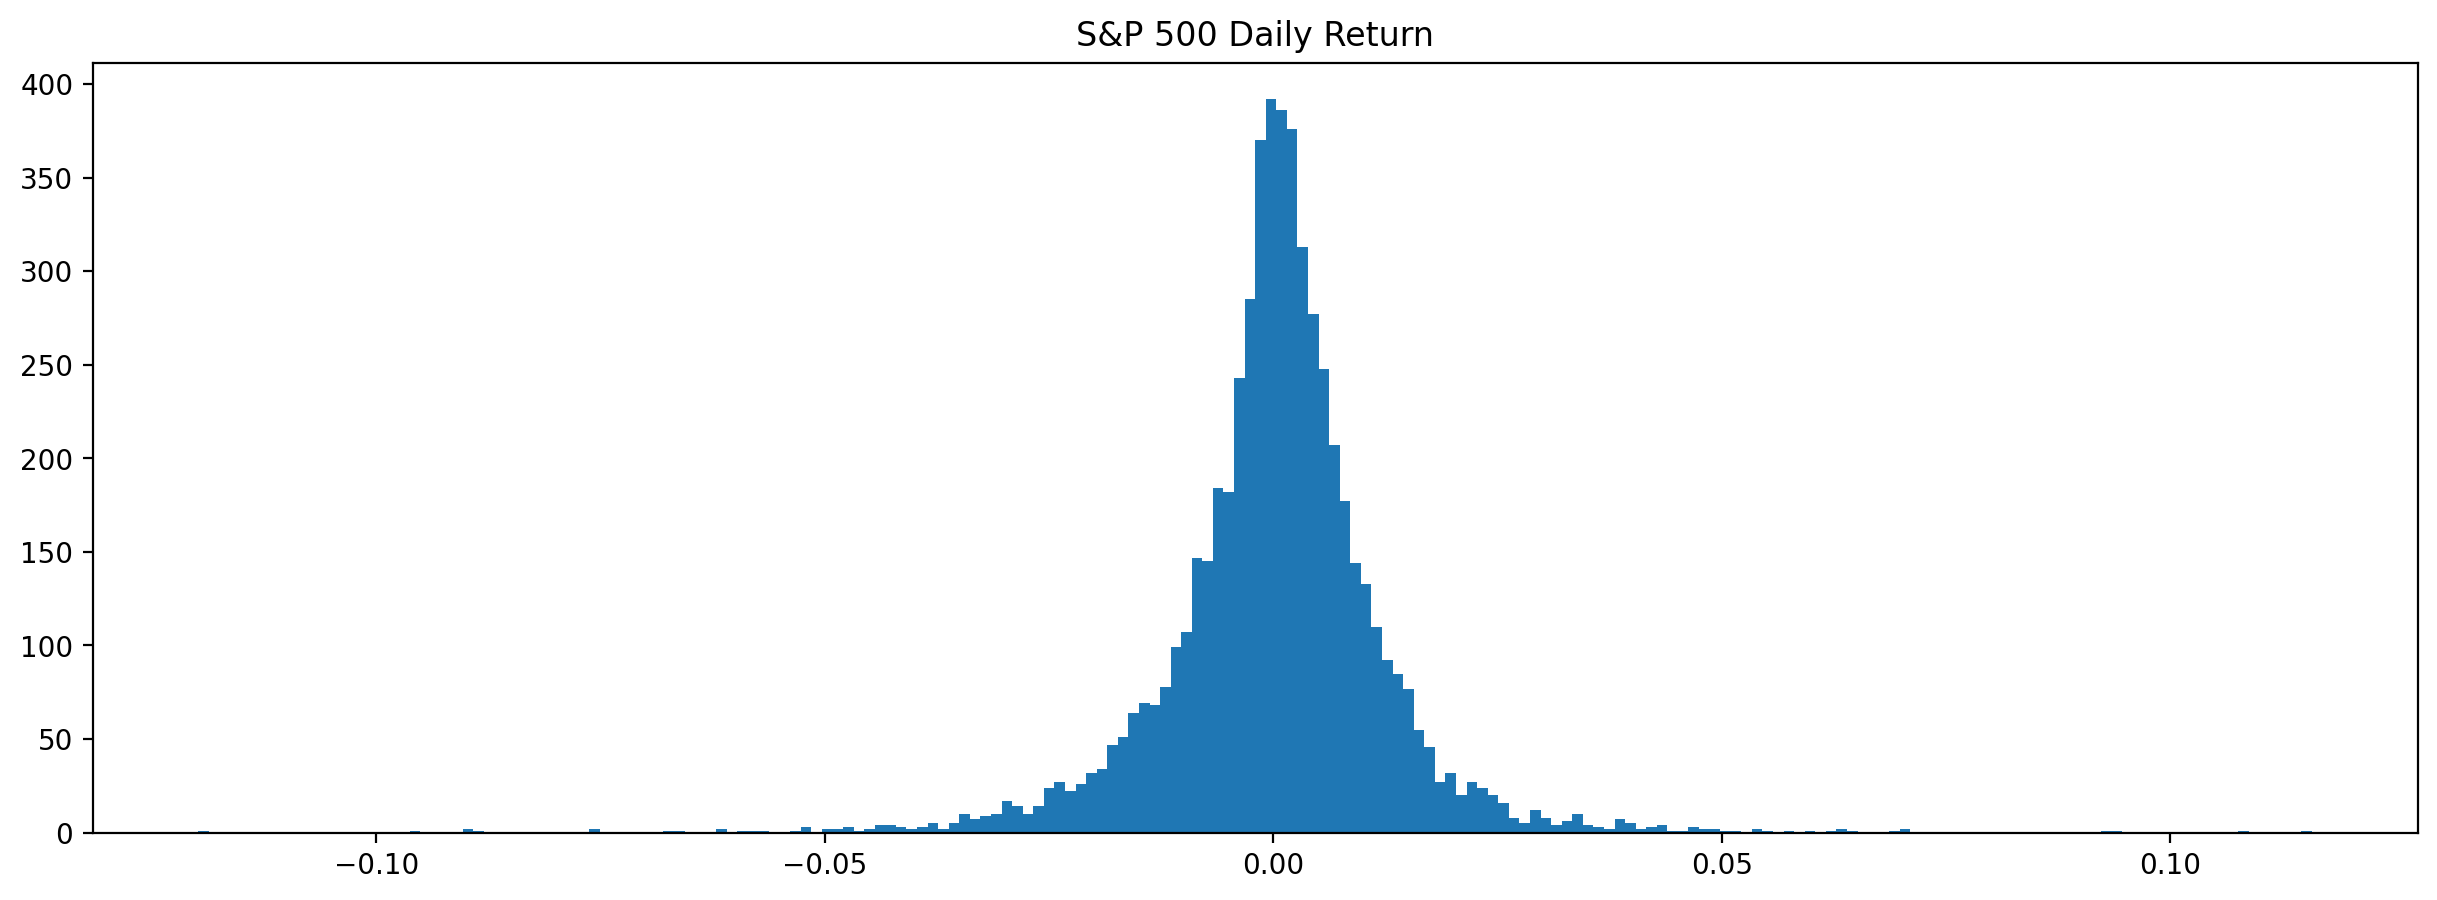

In [ ]:
# Trazando el rendimiento diario usando un histograma
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Daily Return')
sp500['Return'].hist(bins=200, grid=False)
plt.show()

In [ ]:
# Convirtiendo la columna 'date' como tipo 'datetime'
'''
sp500.reset_index(inplace=True)
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index(sp500['Date'],inplace=True)
sp500.drop(columns='Date', inplace=True)
sp500.tail()
'''
# La variable Date pasa a ser una columna
sp500 = sp500.reset_index()
# Conversion del tipo str a datetime de la varibale Date
sp500['Date'] = pd.to_datetime(sp500['Date'])

sp500.tail()


,Date,Open,High,Low,Close,Volume,50ma,200ma,Return
5841,2023-03-22 00:00:00-04:00,4002.040039,4039.489990,3936.169922,3936.969971,4533010000,4013.503208,3934.278164,-0.016463
5842,2023-03-23 00:00:00-04:00,3959.209961,4007.659912,3919.050049,3948.719971,4991600000,4014.092607,3933.414613,0.002985
5843,2023-03-24 00:00:00-04:00,3939.209961,3972.739990,3909.159912,3970.989990,4583970000,4014.120205,3932.466162,0.005640
5844,2023-03-27 00:00:00-04:00,3982.929932,4003.830078,3970.489990,3977.530029,4233540000,4014.007407,3931.774962,0.001647
5845,2023-03-28 00:00:00-04:00,3974.129883,3979.199951,3951.530029,3971.270020,4014600000,4013.451006,3931.542212,-0.001574


In [ ]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   Date    5846 non-null   datetime64[ns, America/New_York]
 1   Open    5846 non-null   float64                         
 2   High    5846 non-null   float64                         
 3   Low     5846 non-null   float64                         
 4   Close   5846 non-null   float64                         
 5   Volume  5846 non-null   int64                           
 6   50ma    5797 non-null   float64                         
 7   200ma   5647 non-null   float64                         
 8   Return  5845 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(7), int64(1)
memory usage: 411.2 KB


In [ ]:
# Guardando el DataFrame en un archivo CSV
sp500.to_csv('data/sp500_index.csv', index=False)

In [ ]:
#values = sp500.loc['2023-02-13':'2023-02-17', 'SP500']
sp500.head()


,Date,Open,High,Low,Close,Volume,50ma,200ma,Return
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,NaN,NaN,NaN
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,NaN,NaN,-0.038345
2,2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,NaN,NaN,0.001922
3,2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,NaN,NaN,0.000956
4,2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,NaN,NaN,0.027090


In [ ]:
# Dibujando el rendimiento anual

# Calcular el retorno anual
year_return = sp500.set_index('Date')['Close'].resample("Y").last().pct_change().to_frame().reset_index()
year_return['Close'] = year_return['Close'] * 100
# Crea columna de booleanos
year_return['Up/Down'] = year_return['Close'] > 0
year_return['Up/Down'] = year_return['Up/Down'].replace({True: 'Up', False: 'Down'})
# Definir el color basado en la columna de booleanos
fig = px.bar(year_return, x='Date', y='Close', color='Up/Down', color_discrete_sequence=['rgb(200, 50, 30)', 'rgb(50, 200, 30)'], width=600)
# establecer el título y los títulos de los ejes
fig.update_layout(title='Annualized S&P 500 Close Price Return',
                  xaxis_title='Year',
                  yaxis_title='Return (%)',
                  template="seaborn" ,
                  bargap=0.05
                  )
fig.update_layout(xaxis_rangeslider_visible=False, height=500,plot_bgcolor='white')
# Cambiar los nombres de la leyenda
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=1, xanchor='right', x=1))
# Configuración de opciones de periodo
#fig.update_xaxes(
#    rangeselector=dict(
#        buttons=list([
#            dict(count=1, label="YTD", step="year", stepmode="todate"),
#            dict(count=1, label="1y", step="year", stepmode="backward"),
#            dict(count=5, label="6y", step="year", stepmode="backward"),
#            dict(count=10, label="10y", step="year", stepmode="backward"),
#            dict(step="all")
#        ])
#    )
#)
# Mostrar la gráfica
fig.show()

In [ ]:
# Dibujando el rendimiento mensual

# Calcular el rendimiento mensual
month_return = sp500.set_index('Date')['Close'].resample("M").last().pct_change().to_frame().reset_index()
month_return['Up/Down'] = month_return['Close'] > 0
month_return['Up/Down'] = month_return['Up/Down'].replace({True: 'Up', False: 'Down'})
month_return['Close'] = month_return['Close'] * 100
# Crear un gráfica de los rendimiento mensuales
fig = px.bar(month_return, x='Date', y='Close', labels='Montly Return (%)', color='Up/Down', color_discrete_sequence=['rgb(200, 50, 30)', 'rgb(50, 200, 30)'])
# Cambiar los nombres de la leyenda
fig.update_layout(legend=dict(title='Monthly Return', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
# Personalizar el título y los títulos de los ejes
fig.update_layout(title='Montly S&P 500 Close Price Return',
                  xaxis_title='Date',
                  yaxis_title='Return (%)',
                  template="seaborn"
                  )
fig.update_layout(xaxis_rangeslider_visible=False, height=600,plot_bgcolor='white')
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Mostrar la gráfica
fig.show()

## **ANALISIS POR SECTORES**

In [ ]:
# URL que contiene las compañias que conforman el indice SP500.
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'


In [ ]:
wiki_tables = pd.read_html(url)

print("Número de tablas en la página web:", len(wiki_tables))


Número de tablas en la página web: 2


In [ ]:
# Seleccionando la primer tabla
wiki_table1 = wiki_tables[0]
wiki_table2 = wiki_tables[1]

sp500_components = wiki_table1

sp500_components.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
sp500_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [ ]:
# Listando aquellos registros que tienen un "." para luego reemplazarlo por "-" tal como aparecen en yahoo finance.
symbols_with_dot = sp500_components[sp500_components['Symbol'].str.contains('\.')]


symbols_with_dot

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
64,BRK.B,Berkshire Hathaway,Financials,Multi-Sector Holdings,"Omaha, Nebraska",2010-02-16,1067983,1839
80,BF.B,Brown–Forman,Consumer Staples,Distillers & Vintners,"Louisville, Kentucky",1982-10-31,14693,1870


In [ ]:
 
sp500_components['Symbol'] = sp500_components['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

In [ ]:
# Creando una lista con los tickers de las acciones

sp500_symbols = sp500_components['Symbol'].tolist()

sp500_symbols[:10]


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP']

In [ ]:
# Conociendo los sectores del sp500 y la cantidad de acciones que lo componen

sectors = sp500_components['GICS Sector'].value_counts( ascending = False)
sectors


Industrials               73
Financials                73
Information Technology    66
Health Care               65
Consumer Discretionary    53
Consumer Staples          37
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    24
Energy                    23
Name: GICS Sector, dtype: int64

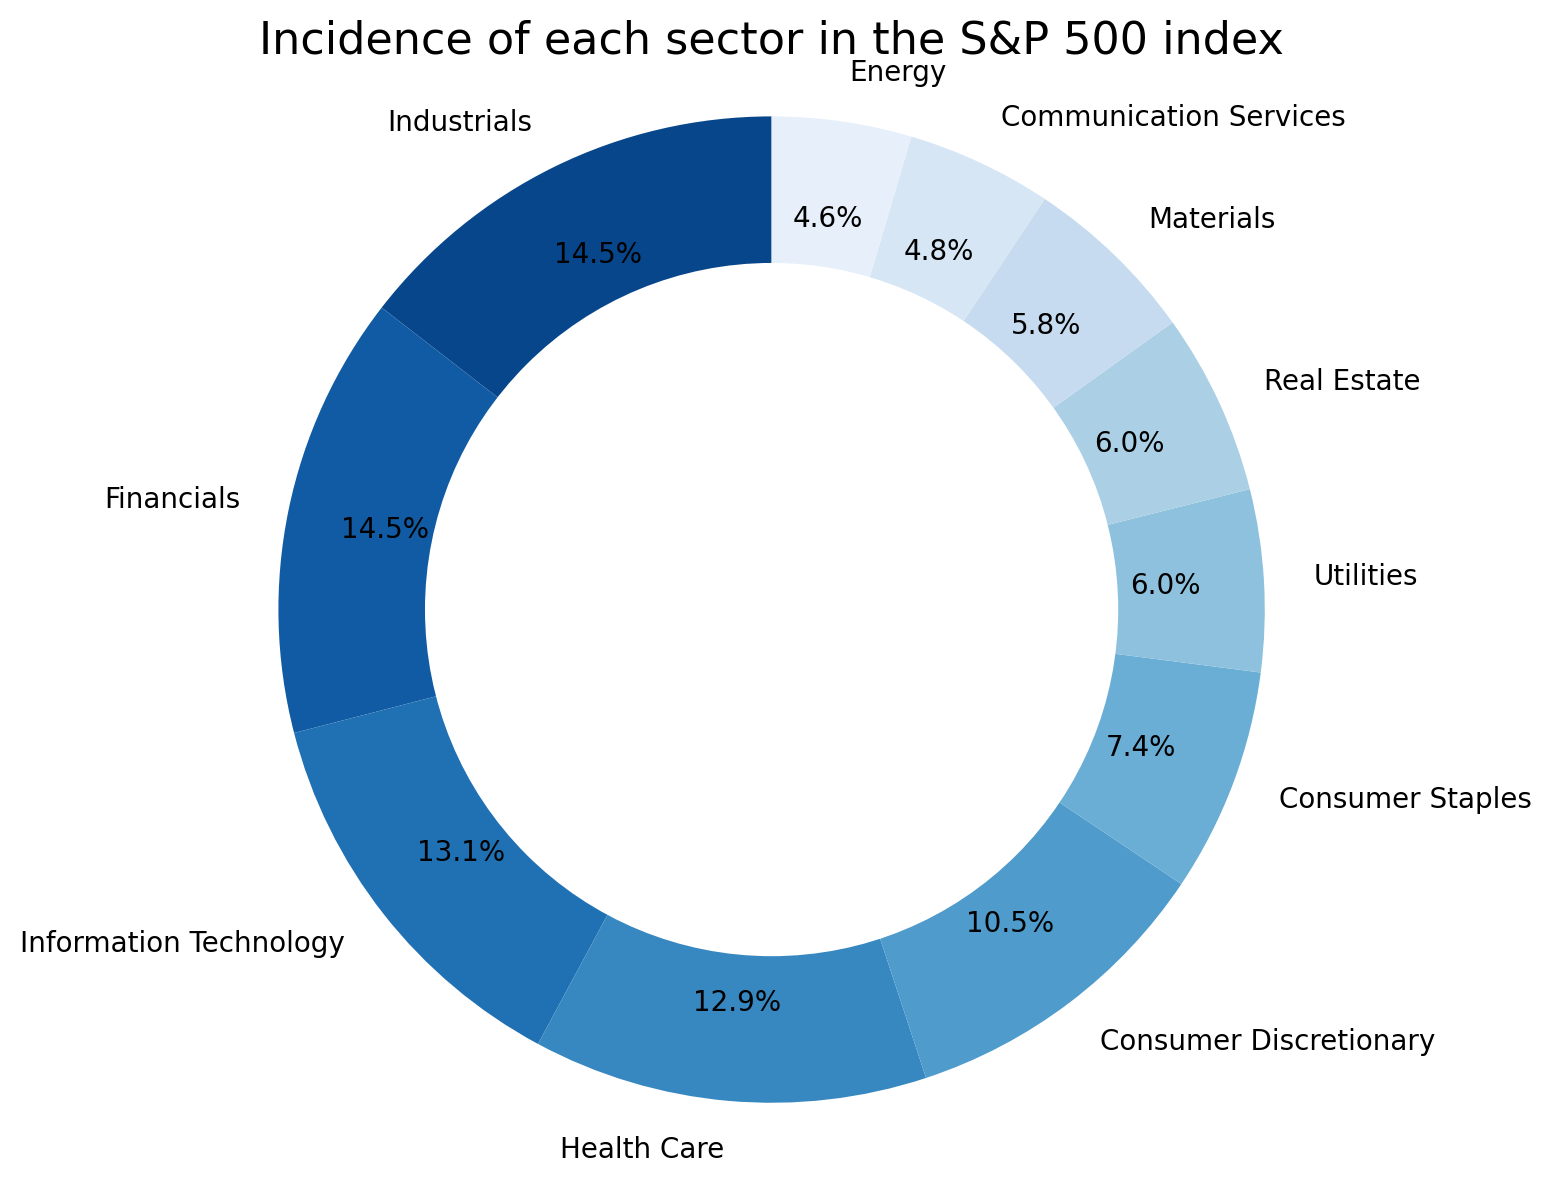

In [ ]:
import seaborn as sns

# contar la cantidad de acciones por sector
# sectors = sp500_sectors['GICS Sector'].value_counts()

# crear una paleta de colores secuencial
colors = sns.color_palette('Blues', n_colors=11)

# ordenar los sectores por cantidad de acciones en orden descendente
sorted_sectors = sectors.sort_values(ascending=False).index

# graficar el gráfico de pastel
def autopct(pct):
    return ('{:.1f}%'.format(pct))

plt.figure(figsize=(7, 7))  # ajustar el tamaño de la figura
plt.pie(sectors[sorted_sectors].values, labels=sorted_sectors, colors=colors[::-1], autopct=autopct, startangle=90, pctdistance=0.8)
plt.title('Incidence of each sector in the S&P 500 index', fontsize=16)  # agregar un título al gráfico
plt.axis('equal')  # hacer que el gráfico sea circular
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # agregar un borde blanco al gráfico
plt.show()


In [ ]:
# Obteniendo la información de cada acción

df_data = yf.download(sp500_symbols,start='2000-01-01',end=None)[['Close','Volume']]
df_data.tail()


[*********************100%***********************]  503 of 503 completed


Close                                                         \
                     A    AAL         AAP        AAPL        ABBV         ABC   
Date                                                                            
2023-03-22  133.729996  13.82  113.599998  157.830002  153.669998  153.440002   
2023-03-23  131.130005  13.63  111.139999  158.929993  155.300003  150.929993   
2023-03-24  131.960007  13.72  110.830002  160.250000  158.020004  156.410004   
2023-03-27  133.070007  13.94  114.739998  158.279999  157.539993  156.690002   
2023-03-28  132.630005  13.98  115.739998  157.649994  158.250000  158.000000   

                                                          ...     Volume  \
                  ABT       ACGL         ACN        ADBE  ...       WYNN   
Date                                                      ...              
2023-03-22  96.860001  65.870003  253.270004  361.709991  ...  2148200.0   
2023-03-23  97.040001  65.599998  271.660004  369.000000  ...  2186100.0   
2023-03-24  98.050003  66.050003  272.000000  374.959991  ...  2296400.0   
2023-03-27  98.459999  66.379997  273.959991  373.149994  ...  1487200.0   
2023-03-28  97.110001  66.809998  275.000000  373.399994  ...  1682700.0   

                                                                               \
                XEL       XOM     XRAY        XYL      YUM        ZBH    ZBRA   
Date                                                                            
2023-03-22  3446200  14952700  1932300  1750600.0  1059800   959000.0  362700   
2023-03-23  3184600  14385900  1616600  1227500.0  1223300  1157800.0  244700   
2023-03-24  2713100  13401600  1834200  1498100.0  1193800   880500.0  322000   
2023-03-27  2912900  14805900  1591900  1365700.0  1315000   822700.0  231900   
2023-03-28  1983000  11033100  1510400  1301700.0   981700   846700.0  177100   

                                 
                ZION        ZTS  
Date                             
2023-03-22   7014400  1475600.0  
2023-03-23   9700700  3560800.0  
2023-03-24  10732600  1864900.0  
2023-03-27   7964100  1273500.0  
2023-03-28   3636300  1098300.0  

[5 rows x 1006 columns]

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5846 entries, 2000-01-03 to 2023-03-28
Columns: 1006 entries, ('Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(640), int64(366)
memory usage: 44.9 MB


In [ ]:
# Convirtiendo la columna 'date' como tipo 'datime'

# La variable Date pasa a ser una columna
df_data = df_data.reset_index()
# Conversion del tipo str a datetime de la varibale Date
df_data['Date'] = pd.to_datetime(df_data['Date'])

df_data.tail()

Date       Close                                             \
                          A    AAL         AAP        AAPL        ABBV   
5841 2023-03-22  133.729996  13.82  113.599998  157.830002  153.669998   
5842 2023-03-23  131.130005  13.63  111.139999  158.929993  155.300003   
5843 2023-03-24  131.960007  13.72  110.830002  160.250000  158.020004   
5844 2023-03-27  133.070007  13.94  114.739998  158.279999  157.539993   
5845 2023-03-28  132.630005  13.98  115.739998  157.649994  158.250000   

                                                    ...     Volume           \
             ABC        ABT       ACGL         ACN  ...       WYNN      XEL   
5841  153.440002  96.860001  65.870003  253.270004  ...  2148200.0  3446200   
5842  150.929993  97.040001  65.599998  271.660004  ...  2186100.0  3184600   
5843  156.410004  98.050003  66.050003  272.000000  ...  2296400.0  2713100   
5844  156.690002  98.459999  66.379997  273.959991  ...  1487200.0  2912900   
5845  158.000000  97.110001  66.809998  275.000000  ...  1682700.0  1983000   

                                                                          \
           XOM     XRAY        XYL      YUM        ZBH    ZBRA      ZION   
5841  14952700  1932300  1750600.0  1059800   959000.0  362700   7014400   
5842  14385900  1616600  1227500.0  1223300  1157800.0  244700   9700700   
5843  13401600  1834200  1498100.0  1193800   880500.0  322000  10732600   
5844  14805900  1591900  1365700.0  1315000   822700.0  231900   7964100   
5845  11033100  1510400  1301700.0   981700   846700.0  177100   3636300   

                 
            ZTS  
5841  1475600.0  
5842  3560800.0  
5843  1864900.0  
5844  1273500.0  
5845  1098300.0  

[5 rows x 1007 columns]

In [ ]:
# Guardando el DataFrame en un archivo CSV
df_data.to_csv('data/sp500_data.csv', index=False)